In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sys.modules['sklearn.externals.six'] = six

%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
df.duplicated().sum()

0

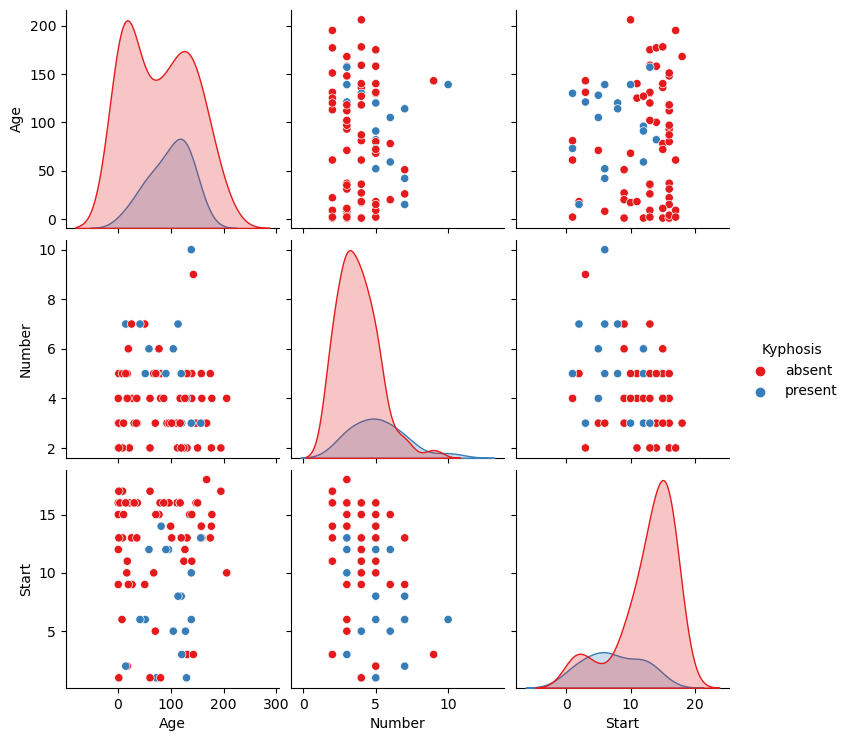

In [24]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

Text(0, 0.5, 'Age')

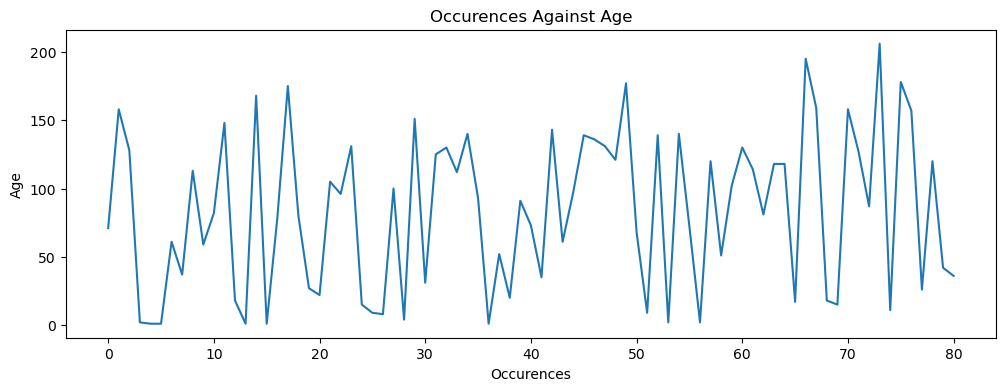

In [26]:
plt.figure(figsize=(12,4))
df['Age'].plot()
plt.title("Occurences Against Age")
plt.xlabel("Occurences")
plt.ylabel("Age")

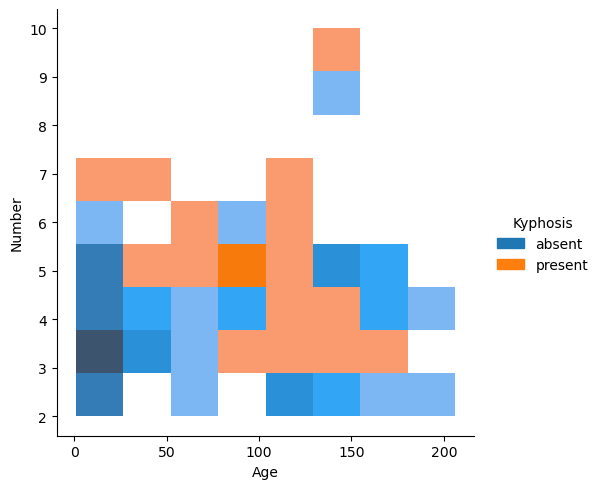

In [18]:
sns.displot(x='Age',y='Number',data=df,cmap='coolwarm',hue='Kyphosis')

In [19]:
## TrainTestSplit The Data


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
# Model Training
# Treeyuh

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
## Training And Evaluation

In [32]:
pred = dtree.predict(X_test)

In [33]:
pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present'], dtype=object)

In [35]:
## Clasification Matrix and confusion Report

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.77      0.81      0.79        21
     present       0.20      0.17      0.18         6

    accuracy                           0.67        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.65      0.67      0.66        27



In [39]:
## Confusion matrix

In [40]:
print(confusion_matrix(y_test,pred))

[[17  4]
 [ 5  1]]


In [41]:
## Printing the decision Tree

In [45]:
from six import StringIO
import six
import sys


In [59]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [60]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

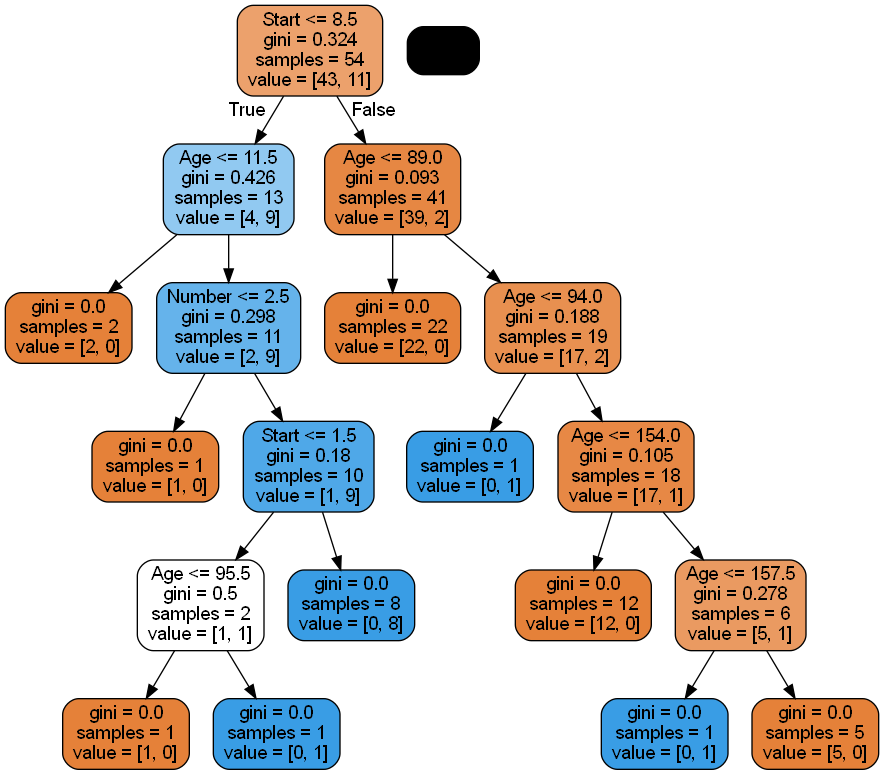

In [61]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
rfc_pred = rfc.predict(X_test)